# Understanding the t-distribution

In [1]:
import numpy as np
from datascience import *
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

## Reminder: This is what the normal distribution looks like

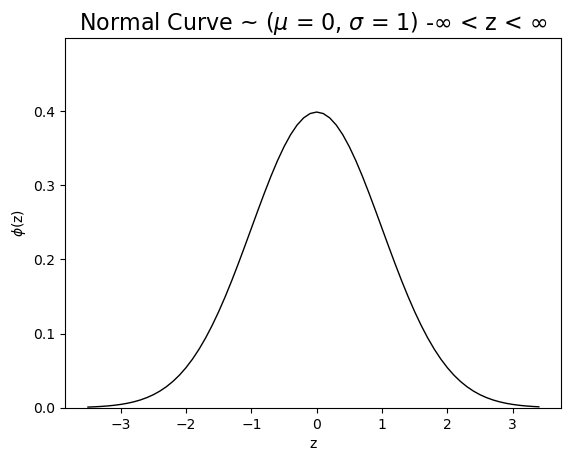

In [2]:
plot_normal_cdf()

## If we know the data are normally distributed AND we know the standard deviation
If $\mu$ and $\sigma$, we can easily calculate the chance that a measured mean came from a given normal distribution (Z-test).

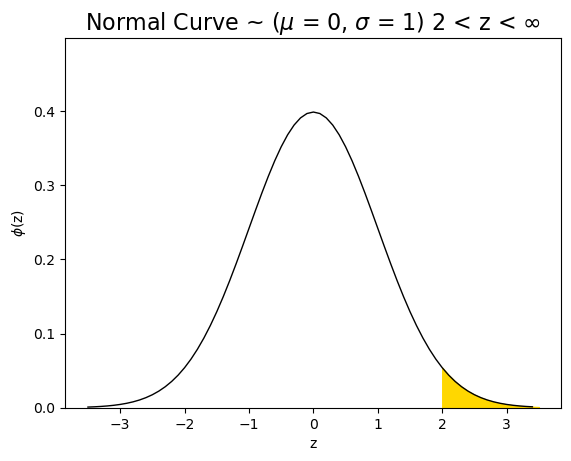

In [3]:
plot_normal_cdf(lbound=2)

## What if do not know $\sigma$, we can estimate it from our sample.
But the problem arises when our samples are small, then our estimate of the standard deviation is potentially influenced by outliers in the small. In other words, the range of estimates of $\sigma$ is larger for a small sample size, N.

This is where the t-distribution arises. It is similar to the normal distribution, but it is shorter an fatter. It has longer tails reflecting the greater uncertainty in the standard deviation.


In [4]:
# Generate random samples from a normal distribution
r = norm.rvs(size=10)
r

array([ 0.24042289,  0.64269929,  0.27980228, -0.62554781, -0.85578453,
        0.87305728, -1.05677148,  0.12704941,  0.32951479,  0.91151135])

In [5]:
mu = 0
std = 1

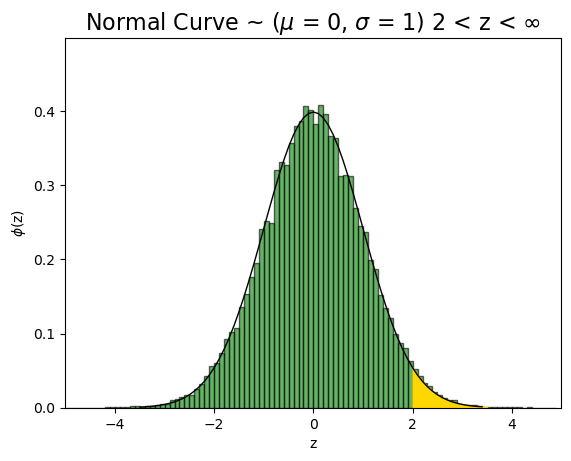

"\n# Plot the PDF.\n#xmin, xmax = plt.xlim()\nx = np.linspace(-10, 10, 100)\np = norm.pdf(x, mu, std)\nax = plt.gca()\nax.set_xlim(-10, 10)\nplt.title('Simulated t-Distribution')\nplt.xlabel('Value')\nplt.ylabel('Frequency')\nplt.plot(x, p, 'r', linewidth=2);\n"

In [50]:
# Simulate taking samples, and calculating their mean
sample_t_values = []
num_simulations = 30000
sample_size = 50
for i in np.arange(num_simulations):
    r1 = norm.rvs(size=sample_size)
    r1_mean = np.mean(r1)
    r1_std = np.std(r1, ddof=1)
    sample_t_values.append(r1_mean / (r1_std / np.sqrt(sample_size)))
sample_t_values = np.array(sample_t_values)


# Histogram of simulated sample means
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.hist(sample_t_values, np.arange(-5, 5, .1), density=True, alpha=0.6, color='g')
plot_normal_cdf(lbound=2);

### Summary
When the sample size we are using to estimate our mean and standard deviation is roughly 30 or more, the normal distribution is fine for estimating the null hypothesis (determining if the mean we see is likely if there is no effect). For smaller sample sizes the affect of outliers creates larger undertainty -- the tails of the distribution are longer -- so we have to use the t-distribution to estimate the chance of seeing our measured outcome under the null hypothesis. Longer tails and greater uncertainty means the difference between the means has to be larger to acheive the same level of confidence.